## Investigation Overview

In this investigation, I wanted to look at what is effects of the trip duration generally, additionally, the correlation of the users considering the age of them.

## Dataset Overview

The data set contain a large value of trip which is 183,412. Looking at the common features in the data, we will find that there is a correlation between trips, stations, and varying ages. that what we will discuss in the following points

In [44]:
# inserting the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [45]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Distribution Upon The Trip Durations

The trip duration is generally settled on the lower area, moreover, Most of the Frequency are less than 2k with summit around 30 minutes. Trip duration Frequency first increases starting from around 8k values at 2.5 Min to almost 15k Frequency at around 5 min but then starts to fall and reaching below 2k values under 20 min.

In [46]:
df['duration_min']=df['duration_sec']/60

In [47]:
df['duration_min'].min(), df['duration_min'].mean(), df['duration_min'].max()

(1.0166666666666666, 12.10130725724969, 1424.0666666666666)

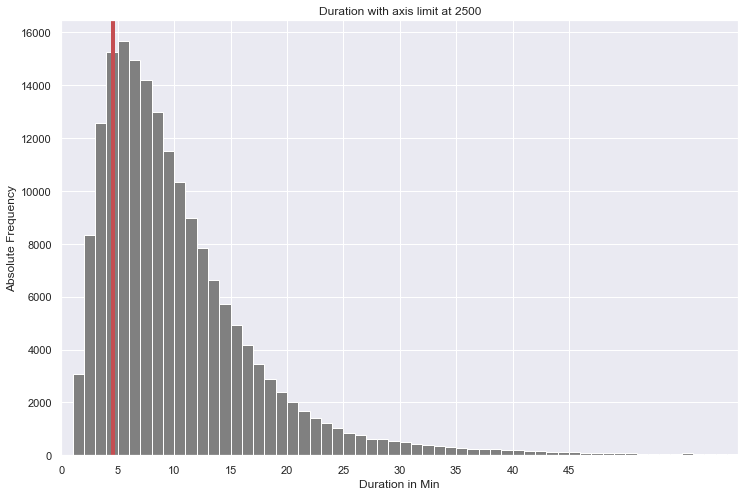

In [48]:
m = df['duration_min'].mode().tolist()

plt.figure(figsize=(20,7))

# since we have a widely spread distribution
plt.subplot(1,2,2)
bins = np.arange(0, df['duration_min'].max()+1, 1)
plt.hist(data = df, x = 'duration_min', bins = bins, color = 'gray')
plt.title('Duration with axis limit at 2500')
plt.xlabel('Duration in Min')
plt.ylabel('Absolute Frequency')
plt.xticks(np.arange(0, 50, 5))
plt.axvline(x=m, color='r', lw=4)
plt.xlim(0, 60)

plt.tight_layout();

### The Duration Reliance On The Gender

Though quantity of male riders are very high then other and female but we can see that higher percentage of female and other rides longer trips then males.

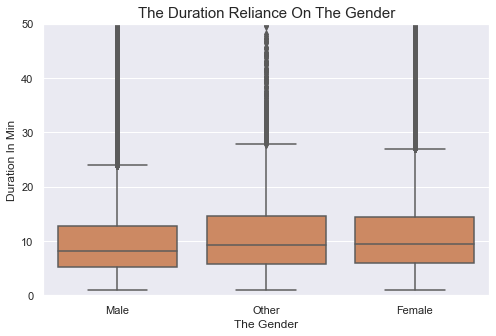

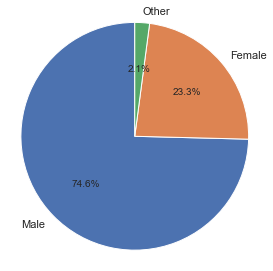

In [49]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_min',color=base_color)
plt.ylim([0, 50])
plt.title('The Duration Reliance On The Gender',size=15)
plt.xlabel('The Gender')
plt.ylabel('Duration In Min')
plt.show()

plt.figure(figsize = [10, 5])
plt.subplot(1,2,1)
Sg = df['member_gender'].value_counts()
plt.pie(Sg, labels=Sg.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square');

### Correlation Between Trip Durations And Age

Most of the users of the bikes are between 20 and 45 years old additionally the longest period occurred from younger users

In [50]:
df['member_age'] = 2019 - df['member_birth_year']

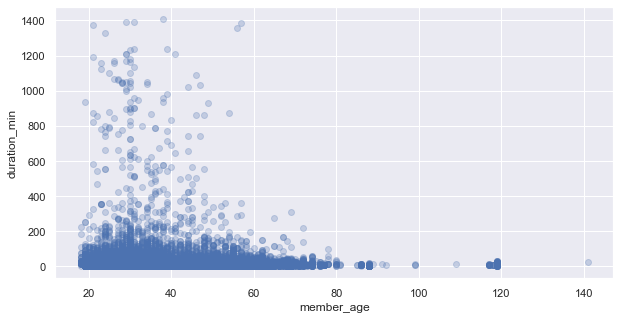

In [51]:
plt.figure(figsize = [10,5])
plt.scatter(x = df['member_age'], y = df['duration_min'], alpha = 0.25)
plt.xlabel("member_age")
plt.ylabel("duration_min");

### The duration reliance on the gender and the member type

The quantity of young riders are very high than the older, the mentioned chart proof that higher percentage of younger share most of the trip.

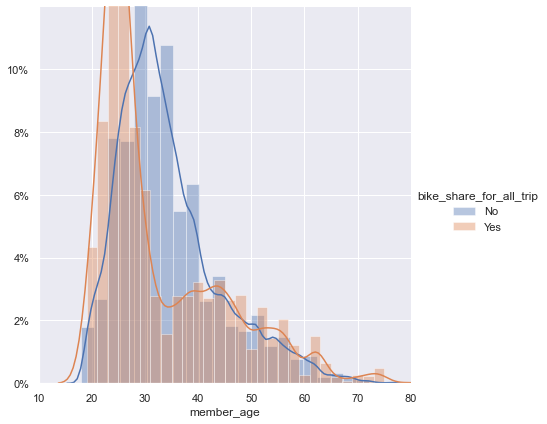

In [52]:
sns.FacetGrid(df,hue='bike_share_for_all_trip',size=6).map(sns.distplot,'member_age').add_legend()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.axis([10, 80, 0, 0.06]);

### Top Ten (Start-End) Stations

According to the following, the top ten start station and top ten end stations of our dataset, Market St. and San Francisco stations are the top Start and end stations

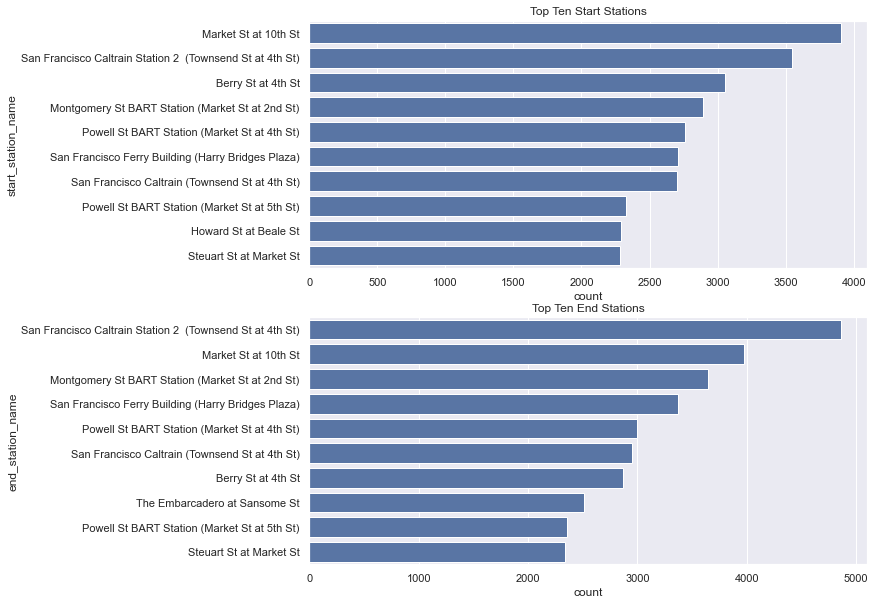

In [53]:
bc = sns.color_palette()[0]
plt.figure(figsize = [10, 10])
plt.subplot(2,1,1)
start_order = df['start_station_name'].value_counts()[:10]
df_start = df.loc[df['start_station_name'].isin(start_order.index)]
sns.countplot(data = df_start, y = 'start_station_name', order = start_order.index, color = bc)
plt.title('Top Ten Start Stations')
plt.subplot(2,1,2)
end_order = df['end_station_name'].value_counts()[:10]
df_end = df.loc[df['end_station_name'].isin(end_order.index)]
sns.countplot(data = df_end, y = 'end_station_name', order = end_order.index, color = bc)
plt.title('Top Ten End Stations');